In [1]:
import pandas as pd

fish = pd.read_csv('data/Fish.csv')

In [2]:
fish_input = fish[['Weight', 'Length2', 'Length3', 'Height', 'Width']]
fish_target = fish[['Species']]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [167]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [168]:
sc.score(train_scaled, train_target)

0.7899159663865546

In [169]:
sc.score(test_scaled, test_target)

0.775

In [170]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.8


/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
import numpy as np

sc =SGDClassifier(loss='log_loss', random_state=42)

train_score=[]
test_score=[]

classes = np.unique(train_target)

In [172]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed w

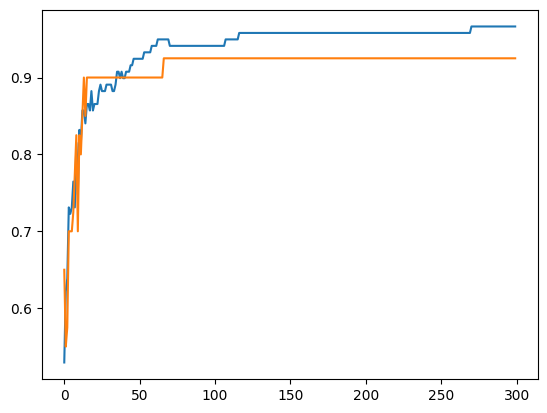

In [174]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()